# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일(202501)
- 최신 csv 파일

In [9]:
df = pd.read_csv('./DataSet/대구승하차인원(2412).csv', encoding = 'EUC-KR')
df

,월,일,역번호,역명,승하차,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,일계
0,1,1,1150,설화명곡,승차,47,55,64,74,130,...,239,198,172,132,99,62,41,24,7,2380
1,1,1,1150,설화명곡,하차,0,68,35,48,83,...,157,193,204,171,147,142,154,136,87,2171
2,1,1,1160,화원,승차,25,31,47,73,131,...,307,237,198,111,75,55,34,19,2,2627
3,1,1,1160,화원,하차,5,84,45,69,121,...,268,221,194,155,111,96,111,92,74,2701
4,1,1,1170,대곡,승차,1,67,61,121,149,...,178,186,189,125,95,78,47,40,10,2415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66793,12,31,3390,지산,하차,3,18,28,151,98,...,212,184,230,247,116,69,78,55,37,2076
66794,12,31,3400,범물,승차,96,97,289,381,252,...,332,332,266,265,119,101,96,79,13,4197
66795,12,31,3400,범물,하차,47,30,92,228,162,...,311,430,334,397,194,146,124,80,55,3881
66796,12,31,3410,용지,승차,27,46,138,240,156,...,177,173,135,124,49,76,60,78,102,2658


In [10]:
columns = ['month', 'day', 'num', 'name', 'type']
time_col = [f'{i}h-{i+1}h'for i in range(5,24)]
columns = columns + time_col+['total']
columns

['month',
 'day',
 'num',
 'name',
 'type',
 '5h-6h',
 '6h-7h',
 '7h-8h',
 '8h-9h',
 '9h-10h',
 '10h-11h',
 '11h-12h',
 '12h-13h',
 '13h-14h',
 '14h-15h',
 '15h-16h',
 '16h-17h',
 '17h-18h',
 '18h-19h',
 '19h-20h',
 '20h-21h',
 '21h-22h',
 '22h-23h',
 '23h-24h',
 'total']

In [11]:
df.columns = columns
df

,month,day,num,name,type,5h-6h,6h-7h,7h-8h,8h-9h,9h-10h,...,15h-16h,16h-17h,17h-18h,18h-19h,19h-20h,20h-21h,21h-22h,22h-23h,23h-24h,total
0,1,1,1150,설화명곡,승차,47,55,64,74,130,...,239,198,172,132,99,62,41,24,7,2380
1,1,1,1150,설화명곡,하차,0,68,35,48,83,...,157,193,204,171,147,142,154,136,87,2171
2,1,1,1160,화원,승차,25,31,47,73,131,...,307,237,198,111,75,55,34,19,2,2627
3,1,1,1160,화원,하차,5,84,45,69,121,...,268,221,194,155,111,96,111,92,74,2701
4,1,1,1170,대곡,승차,1,67,61,121,149,...,178,186,189,125,95,78,47,40,10,2415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66793,12,31,3390,지산,하차,3,18,28,151,98,...,212,184,230,247,116,69,78,55,37,2076
66794,12,31,3400,범물,승차,96,97,289,381,252,...,332,332,266,265,119,101,96,79,13,4197
66795,12,31,3400,범물,하차,47,30,92,228,162,...,311,430,334,397,194,146,124,80,55,3881
66796,12,31,3410,용지,승차,27,46,138,240,156,...,177,173,135,124,49,76,60,78,102,2658


In [12]:
df['date'] = pd.to_datetime(df[['month', 'day']].assign(year=2024))
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [13]:
df

,month,day,num,name,type,5h-6h,6h-7h,7h-8h,8h-9h,9h-10h,...,16h-17h,17h-18h,18h-19h,19h-20h,20h-21h,21h-22h,22h-23h,23h-24h,total,date
0,1,1,1150,설화명곡,승차,47,55,64,74,130,...,198,172,132,99,62,41,24,7,2380,2024-01-01
1,1,1,1150,설화명곡,하차,0,68,35,48,83,...,193,204,171,147,142,154,136,87,2171,2024-01-01
2,1,1,1160,화원,승차,25,31,47,73,131,...,237,198,111,75,55,34,19,2,2627,2024-01-01
3,1,1,1160,화원,하차,5,84,45,69,121,...,221,194,155,111,96,111,92,74,2701,2024-01-01
4,1,1,1170,대곡,승차,1,67,61,121,149,...,186,189,125,95,78,47,40,10,2415,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66793,12,31,3390,지산,하차,3,18,28,151,98,...,184,230,247,116,69,78,55,37,2076,2024-12-31
66794,12,31,3400,범물,승차,96,97,289,381,252,...,332,266,265,119,101,96,79,13,4197,2024-12-31
66795,12,31,3400,범물,하차,47,30,92,228,162,...,430,334,397,194,146,124,80,55,3881,2024-12-31
66796,12,31,3410,용지,승차,27,46,138,240,156,...,173,135,124,49,76,60,78,102,2658,2024-12-31


In [14]:
df1 = df[['date',
          'num',
          'name',
          'type',
          '5h-6h',
         '6h-7h',
         '7h-8h',
         '8h-9h',
         '9h-10h',
         '10h-11h',
         '11h-12h',
         '12h-13h',
         '13h-14h',
         '14h-15h',
         '15h-16h',
         '16h-17h',
         '17h-18h',
         '18h-19h',
         '19h-20h',
         '20h-21h',
         '21h-22h',
         '22h-23h',
         '23h-24h',
         'total']]

In [15]:
df1

,date,num,name,type,5h-6h,6h-7h,7h-8h,8h-9h,9h-10h,10h-11h,...,15h-16h,16h-17h,17h-18h,18h-19h,19h-20h,20h-21h,21h-22h,22h-23h,23h-24h,total
0,2024-01-01,1150,설화명곡,승차,47,55,64,74,130,150,...,239,198,172,132,99,62,41,24,7,2380
1,2024-01-01,1150,설화명곡,하차,0,68,35,48,83,86,...,157,193,204,171,147,142,154,136,87,2171
2,2024-01-01,1160,화원,승차,25,31,47,73,131,183,...,307,237,198,111,75,55,34,19,2,2627
3,2024-01-01,1160,화원,하차,5,84,45,69,121,130,...,268,221,194,155,111,96,111,92,74,2701
4,2024-01-01,1170,대곡,승차,1,67,61,121,149,163,...,178,186,189,125,95,78,47,40,10,2415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66793,2024-12-31,3390,지산,하차,3,18,28,151,98,87,...,212,184,230,247,116,69,78,55,37,2076
66794,2024-12-31,3400,범물,승차,96,97,289,381,252,248,...,332,332,266,265,119,101,96,79,13,4197
66795,2024-12-31,3400,범물,하차,47,30,92,228,162,200,...,311,430,334,397,194,146,124,80,55,3881
66796,2024-12-31,3410,용지,승차,27,46,138,240,156,222,...,177,173,135,124,49,76,60,78,102,2658


In [16]:
df2 = df1.groupby(['date', 'num', 'name']).sum().reset_index()
print(df2)

             date   num  name  type  5h-6h  6h-7h  7h-8h  8h-9h  9h-10h  \
0      2024-01-01  1150  설화명곡  승차하차     47    123     99    122     213   
1      2024-01-01  1160    화원  승차하차     30    115     92    142     252   
2      2024-01-01  1170    대곡  승차하차      5    121     96    161     214   
3      2024-01-01  1180    진천  승차하차     69    232    185    265     353   
4      2024-01-01  1190    월배  승차하차     39    116    130    166     214   
...           ...   ...   ...   ...    ...    ...    ...    ...     ...   
33394  2024-12-31  3370    황금  승차하차    137    109    247    499     354   
33395  2024-12-31  3380   수성못  승차하차     22    118    126    296     198   
33396  2024-12-31  3390    지산  승차하차     37     80    208    411     372   
33397  2024-12-31  3400    범물  승차하차    143    127    381    609     414   
33398  2024-12-31  3410    용지  승차하차     28    104    216    413     286   

       10h-11h  ...  15h-16h  16h-17h  17h-18h  18h-19h  19h-20h  20h-21h  \
0          236  ...   

In [17]:
df3 = df2[['date','num','name','total']]
print(df3)

             date   num  name  total
0      2024-01-01  1150  설화명곡   4551
1      2024-01-01  1160    화원   5328
2      2024-01-01  1170    대곡   4577
3      2024-01-01  1180    진천   8781
4      2024-01-01  1190    월배   4149
...           ...   ...   ...    ...
33394  2024-12-31  3370    황금   6502
33395  2024-12-31  3380   수성못   5346
33396  2024-12-31  3390    지산   4777
33397  2024-12-31  3400    범물   8078
33398  2024-12-31  3410    용지   4899

[33399 rows x 4 columns]


In [18]:
df3['month'] = pd.to_datetime(df3['date']).dt.month

C:\Users\jszxr\AppData\Local\Temp\ipykernel_29796\1816052920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month'] = pd.to_datetime(df3['date']).dt.month


In [19]:
df3

,date,num,name,total,month
0,2024-01-01,1150,설화명곡,4551,1
1,2024-01-01,1160,화원,5328,1
2,2024-01-01,1170,대곡,4577,1
3,2024-01-01,1180,진천,8781,1
4,2024-01-01,1190,월배,4149,1
...,...,...,...,...,...
33394,2024-12-31,3370,황금,6502,12
33395,2024-12-31,3380,수성못,5346,12
33396,2024-12-31,3390,지산,4777,12
33397,2024-12-31,3400,범물,8078,12


In [20]:
sta = df3.groupby(['month', 'name'])['total'].sum().reset_index()
top = sta.loc[sta.groupby('month')['total'].idxmax()]
print(top)

      month  name    total
37        1  반월당2  1270110
128       2  반월당2  1204434
220       3  반월당2  1316738
311       4  반월당2  1220865
402       5  반월당2  1375577
493       6  반월당2  1211767
584       7  반월당2  1314405
675       8  반월당2  1244793
766       9  반월당2  1182480
857      10  반월당2  1256839
949      11  반월당2  1268233
1041     12  반월당2  1374265


In [21]:
df_j = df3[df3['month'] == 1]  # 1월 데이터만 선택
df_j = df_j.groupby('name')['total'].sum().reset_index()  

In [22]:
df_j

,name,total
0,각산,229539
1,감삼,381969
2,강창,329395
3,건들바위,91073
4,경대병원,411658
...,...,...
86,학정,20633
87,해안,137900
88,현충로,186754
89,화원,227891


In [23]:
df = df_j.sort_values('total', ascending=False)
df

,name,total
37,반월당2,1270110
23,동대구역,1029547
74,중앙로,926215
36,반월당1,634998
43,상인,631375
...,...,...
84,팔달,68825
59,어린이세상,64399
16,대공원,36278
60,연호,33727


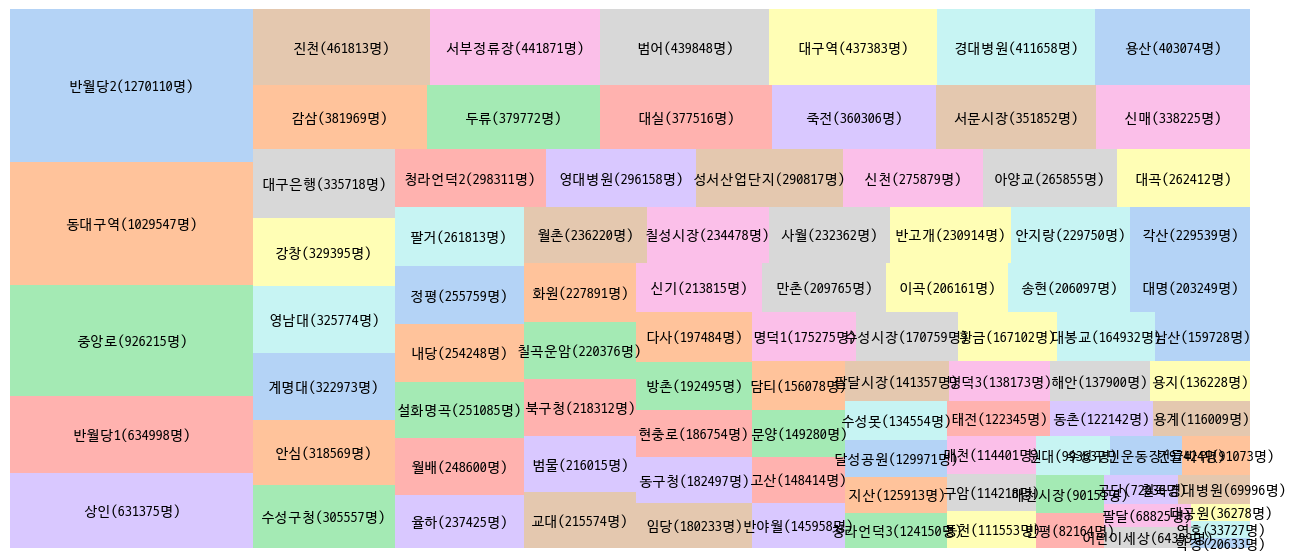

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = './DataSet/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams['font.family'] = 'D2Coding'

import squarify
import seaborn as sns

colors = sns.color_palette("pastel", len(df))

plt.figure(figsize=(16,7))
squarify.plot(sizes = df['total'], label = [f'{x[0]}({x[1]}명)' for x in zip(df['name'],df['total'])], alpha = 0.8, color=colors)
plt.rcParams['font.size'] = 15
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()